INDICADORES TÉCNICOS

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import talib as ta

df_stocks = yf.download('^GSPC', start='2015-01-01', end='2022-01-01')[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df_stocks.head()

[*********************100%***********************]  1 of 1 completed


,adj_close
Date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893


In [7]:
#Calcular RSI (Indica la fuerza y la dirección del momento del activo)

df_stocks['rsi'] = ta.RSI(df_stocks['adj_close'], timeperiod=14)
df_stocks.tail()

,adj_close,rsi
Date,,
2021-12-27,4791.189941,61.358473
2021-12-28,4786.350098,60.863656
2021-12-29,4793.060059,61.329270
2021-12-30,4778.729980,59.695830
2021-12-31,4766.180176,58.233054


In [4]:
#Esta parte crea la función para visulaizar la grafica del RSI
def plot_rsi(prices, rsi):
    plt.subplots(figsize=(20,8))
    ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((12,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(rsi, color = 'grey', linewidth = 1.5, label = "RSI")
    ax2.axhline(y=79, color = "red", linestyle="--")
    ax2.axhline(y=30, color = "green", linestyle="--")

    plt.legend(loc = "lower right")
    plt.show()


C:\Users\alvar\AppData\Local\Temp\ipykernel_13488\1463212889.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 5, colspan = 1)


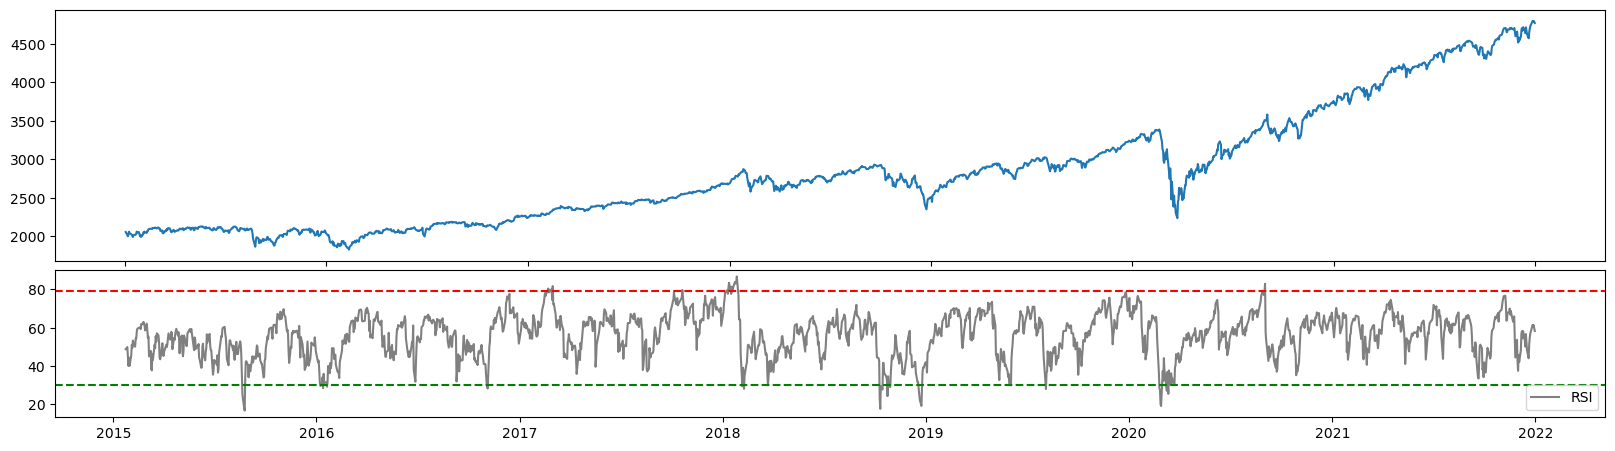

In [8]:
plot_rsi(df_stocks['adj_close'], df_stocks['rsi'])

En esta gráfica que se divide en dos partes, como se puede ver arriba se indica el precio y abajo el RSI.
El RSI nos indica lo sobrecomprado o sobrevendido que está un activo.
Si el RSI está por encima de 70 se dice que el activo está sobrecomprado por lo que se podría decir que posiblemente su precio descienda o baje.
Por el contrario un activo por debajo de 30 estará sobrevendido por lo que posiblemente su precio subirá.
Estos valores de 70 y 30 se pueden ajustar según la estrategia. aunque lo común sea usar estos. Por ejemplo podrían ser 75 y 25.


MACDID

Es otro indicador muy interesante relacionado con el momento.
Devuelve tres lineas de tiempo.

In [11]:
df_stocks['macd'], df_stocks['macd_signal'], df_stocks['macd_hist'] = ta.MACD(df_stocks['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9)
df_stocks.tail()

#Fastperiod / periodo rapido      slowperiod/ periodo lento     /signalperiod=señal    
#Son parametros ajustables según el tipo de análisis.

,adj_close,rsi,macd,macd_signal,macd_hist
Date,,,,,
2021-12-27,4791.189941,61.358473,24.313332,14.672509,9.640824
2021-12-28,4786.350098,60.863656,30.850591,17.908125,12.942466
2021-12-29,4793.060059,61.329270,36.156068,21.557714,14.598355
2021-12-30,4778.729980,59.695830,38.757607,24.997692,13.759914
2021-12-31,4766.180176,58.233054,39.353043,27.868762,11.484280


In [12]:
#Para graficar el MACDID creamos esta función

def plot_macd(prices, macd, signal, hist):
    plt.subplots(figsize=(20,8))
    ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((12,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = "MACD")
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = "SIGNAL")

    for i in range(len(prices)):
        if str(hist[1])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = "lower right")
    plt.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_13488\1501839730.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 5, colspan = 1)


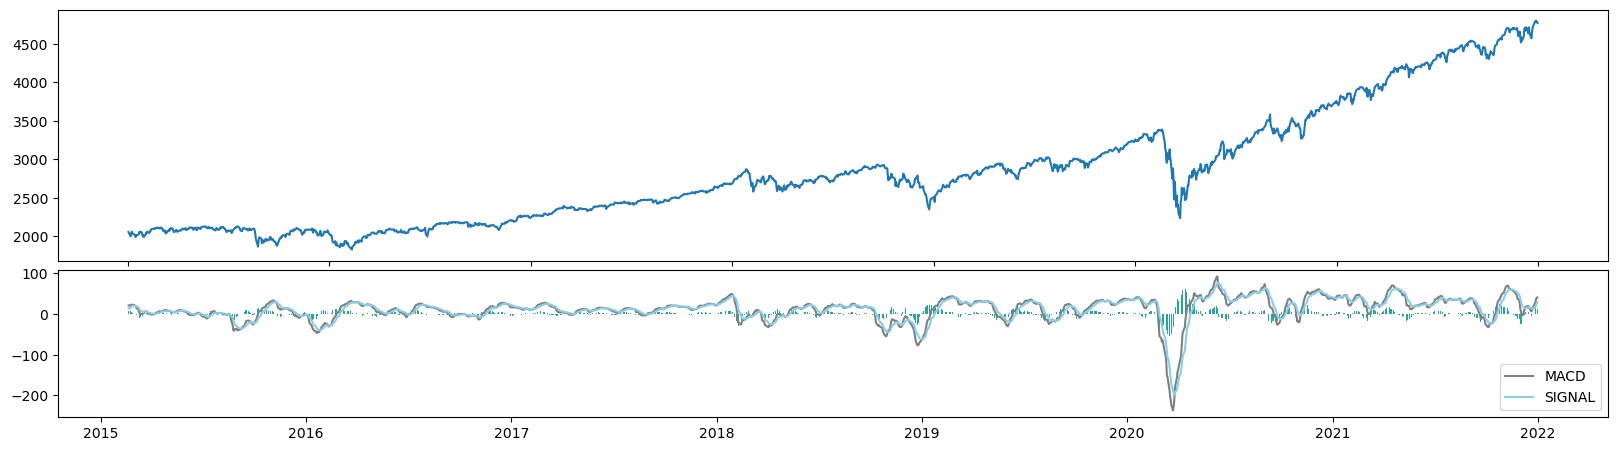

In [13]:
plot_macd(df_stocks['adj_close'], df_stocks['macd'], df_stocks['macd_signal'], df_stocks['macd_hist'])

C:\Users\alvar\AppData\Local\Temp\ipykernel_13488\1501839730.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 5, colspan = 1)


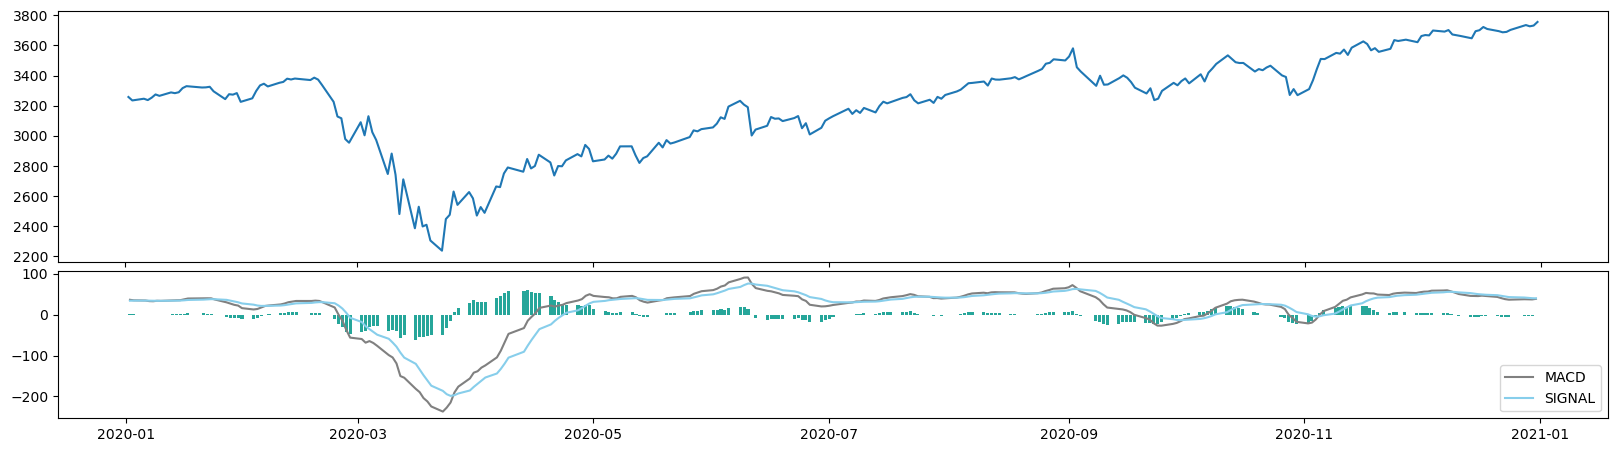

In [14]:
#### MUY INTERESANTE
#Si solo quisieramos ver el año 2020 hariamos lo siguiente al llamar a la función:

plot_macd(df_stocks['adj_close'].loc['2020'], df_stocks['macd'].loc['2020'], df_stocks['macd_signal'].loc['2020'], df_stocks['macd_hist'].loc['2020'])

Por último otro indicador interesante son las bandas de Rodinger, que nos sirven para medir la volatilidad de los activos

In [16]:
df_stocks['bb_upper'], df_stocks['bb_middle'], df_stocks['bb_lower'] = ta.BBANDS(df_stocks['adj_close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
#Los valores tambien se pueden ajustar
#nbdevdup indica cuantas desviaciones estandar por encima de la media
#nbdevdup indica cuantas desviaciones estandar por debajo de la media
#matype indica el tipo de media, en 0 sería la simple, aunque podría indicarse la exponencial por ejemplo
df_stocks.tail()

,adj_close,rsi,macd,macd_signal,macd_hist,bb_upper,bb_middle,bb_lower
Date,,,,,,,,
2021-12-27,4791.189941,61.358473,24.313332,14.672509,9.640824,4784.824104,4647.147534,4509.470964
2021-12-28,4786.350098,60.863656,30.850591,17.908125,12.942466,4804.185072,4653.701538,4503.218005
2021-12-29,4793.060059,61.329270,36.156068,21.557714,14.598355,4821.577177,4665.004541,4508.431905
2021-12-30,4778.729980,59.695830,38.757607,24.997692,13.759914,4825.859808,4678.289038,4530.718268
2021-12-31,4766.180176,58.233054,39.353043,27.868762,11.484280,4832.369283,4687.743042,4543.116801


In [17]:
#Para graficar las bandas de Rodinger usaremos esta función
def plot_bbands(prices, bb_upper, bb_middle, bb_lower):
    _, ax = plt.subplots(figsize=(20,6))
    ax.set_title("Bandas de Bollinger")
    ax.plot(prices, color='green', label="SP500")
    ax.plot(bb_upper, color='red', label="Upper BBand")
    ax.plot(bb_middle, color='yellow', label="Middle BBand")
    ax.plot(bb_lower, color='blue', label="Lower BBand")
    ax.legend()
    plt.show()


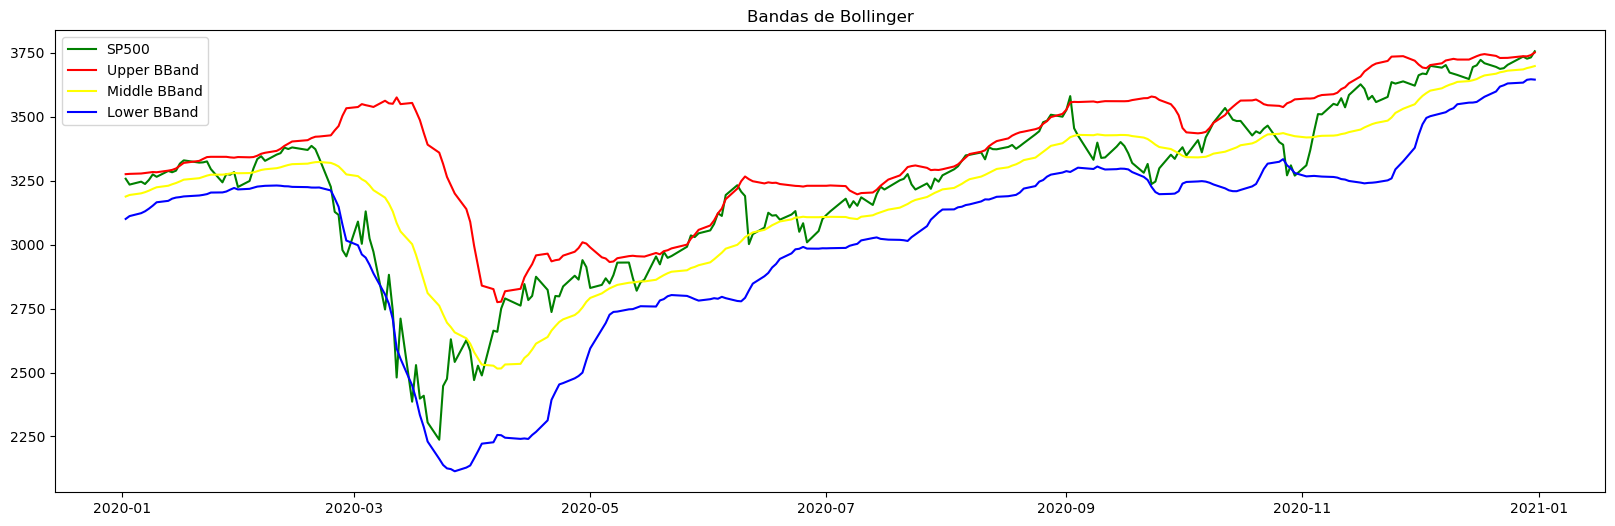

In [18]:
plot_bbands(df_stocks['adj_close'].loc['2020'],df_stocks['bb_upper'].loc['2020'],df_stocks['bb_middle'].loc['2020'],df_stocks['bb_lower'].loc['2020'],)

En las bandas de rodinger se suele la superación del precio de dichas bandas, es decir cuando el precio por ejemplo supera la banda inferior azul se dice que esta volverá a la media, representada en este caso por la banda amarilla. Y igual con la roja.